In [52]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate
from scipy.optimize import curve_fit

In [53]:
### SPLITTING BY Z Cuting at any imag
#allz = '../Compute_correlation/SpSh_angcor_RAcut_zcut_Agcut_2classification.txt'
#allz = './Corrfunc_visinsp_v2.txt'
allz = '../Final_Angcor_Result.txt'

#lowz = '/Users/johntimlin/Highz_Clustering/Angular_Clustering_Final/Compute_correlation/SpSh_angcor_RAcut_zcut_Agcut_2classification.txt'
#highz ='../Compute_correlation/SpSh_angcor_highz.txt'

#allzJK = '../Compute_correlation/SpSh_angcor_RAcut_zcut_Agcut_2classification_JK.txt'
#allzJK = './Corrfunc_visinsp_v2_JK.txt'
allzJK = '../Final_Angcor_Result_JK.txt'

#lowzJK = '/Users/johntimlin/Highz_Clustering/Angular_Clustering_Final/Compute_correlation/SpSh_angcor_RAcut_zcut_Agcut_2classification_JK.txt'
#highzJK ='../Compute_correlation/SpSh_angcor_highz_JK.txt'

datfiles = [allz]#,lowz]
JKfiles = [allzJK]#,lowzJK]


In [54]:
#Loop over the data files list to open and plot the correlation function
separation = []
wnames = []
RRnames = []
for infile in datfiles:
    fileopen = open(infile,'rw')
    header = fileopen.readline()
    data = fileopen.readlines() 

    th = []
    w = []
    RR = []

    for i in range(len(data)):
        t = float(data[i].split()[0]) #Theta
        x = float(data[i].split()[4]) #w(theta) 
        rr = float(data[i].split()[3]) #RR 
        w.append(x)
        RR.append(rr)
        th.append(t)
    #Put the w and RR values into an array to call for Jackknife calculation
    wnames.append(w)
    RRnames.append(RR)
    separation.append(th)

In [55]:
sigma = []
covmat = []
JK_xi = []
for h in range(len(JKfiles)):
    size = float(len(separation[h]))
    jkdat = open(JKfiles[h],'rw')
    #Read the header of the jackknife file and assign the number of jackknife resamples done for the sample
    jkhead = jkdat.readline()
    print jkhead
    jknum= np.float(jkhead.split()[7])
    #Pull out the proper info from the file (RR,Xi,etc.) for each jackknife and put into array
    RRjk = np.zeros([jknum,int(size)])
    Xijk = np.zeros([jknum,int(size)])
    Thjk = np.zeros([jknum,int(size)])
    
    num=jkdat.readlines()
    row = 0
    k=0

    for j in range(len(num)):
        #At the end of a Jackknife run, I create a new line called 'STEP_DONE' which tells me that my next JK routine is running and separates the two.
        if num[j].split()[0] == 'STEP_DONE':
            row +=1
            k=0
        #For each of the JK runs, append the info into arrays
        else:
            Thjk[row,k] = float(num[j].split()[0])
            RRjk[row,k] = float(num[j].split()[3])
            Xijk[row,k] = float(num[j].split()[4])
            k+=1
    #Compute the covariance matrix 
    JK_xi.append(Xijk)
    C = np.zeros([len(RRjk[0]),len(RRjk[0])])
    for m in range(len(RRjk[0])):
        for n in range(len(RRjk[0])):
            left = np.sqrt(np.asarray(RRjk[:,m])/RRnames[h][m])
            dwa = np.asarray(Xijk[:,m]) - wnames[h][m]
            right = np.sqrt(np.asarray(RRjk[:,n])/RRnames[h][n])
            dwb = np.asarray(Xijk[:,n]) - wnames[h][n]
            val = left*dwa*right*dwb
            C[m,n] = sum(val)
    sigma.append(np.diag(C))
    covmat.append(C)
            
for i in sigma[0]:
    print '%1.13f'%i
print sigma[0]

#Theta DD DR RR XI factor=33.7837837838 jknum= 10

0.0480844380963
0.6150733777994
0.0829658263550
0.1449925297907
0.0950414350497
0.0313864760979
0.0357319700732
0.0043667620723
0.0047534063077
0.0008812055277
0.0010911029179
0.0001789195267
0.0001423495584
0.0000842636879
0.0000310959938
0.0000117297044
0.0000046196618
0.0000058294415
0.0000052940316
0.0000102760569
0.0000116325175
[  4.80844381e-02   6.15073378e-01   8.29658264e-02   1.44992530e-01
   9.50414350e-02   3.13864761e-02   3.57319701e-02   4.36676207e-03
   4.75340631e-03   8.81205528e-04   1.09110292e-03   1.78919527e-04
   1.42349558e-04   8.42636879e-05   3.10959938e-05   1.17297044e-05
   4.61966179e-06   5.82944148e-06   5.29403165e-06   1.02760569e-05
   1.16325175e-05]


/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [56]:
#Following Limber was computed with cosmology (H0,oM,oL)=(70 0.274489795918 0.725510204082)

##This mclimber was done for allz 2.9<2<5.15
mclimber_all = [0.0018901069830166064, 0.0015469541773802007, 0.0012618003172005974, 0.0010646848849014826, 0.00092659609065711736, 0.0008121011076479759, 0.00069717733505905916, 0.00057620099028505515, 0.00045441356648772189, 0.0003334100976949317, 0.00022407216949898401, 0.00013460720655439581, 6.8890660458582111e-05, 2.8945118539565589e-05, 8.5993807832771192e-06, 2.6124134574857943e-06, -2.353262803259482e-06, -1.0507113239217212e-06, -4.7148295416947918e-07, -9.8152287015064401e-08]

#Lowz mclimber 2.9<2<3.4
mclimber_low = [0.0044477998043758677, 0.0036112654673913242, 0.0029158044391958868, 0.0024111455996782979, 0.0020569973732013588, 0.0018017839702771194, 0.0015315070041019771, 0.0012691931810851107, 0.0010075833381944822, 0.00075434181685649223, 0.00050795884326507547, 0.0002965548495608406, 0.00016764802583984481, 7.3381272557181558e-05, 1.371220983010611e-05, 5.5506979609669511e-06, -1.4020592353893683e-05, 2.2652902066516834e-06, 2.310737462803802e-06, 4.2790243898727134e-07]

#This mclimber was done for 3.4<z<5
mclimber_high = [0.0021612146984227114, 0.0017915613501401173, 0.0015090379209649599, 0.0013335946010651777, 0.0011883879587747991, 0.0010389364077332405, 0.0008905878071767976, 0.00072628713786955968, 0.00058158640964684318, 0.00042241571718415813, 0.00027336529427609223, 0.00016511117031507011, 8.1855335072549657e-05, 3.8284627330113334e-05, 1.1226301215780448e-05, 5.0014575973491967e-06, -2.5621990019662722e-06, -1.1988011477889577e-07, -2.6253218073191083e-06, -2.8749589456269404e-06]
limbera = np.asarray(mclimber_all)*np.pi / 0.7**3 
#limberl = np.asarray(mclimber_low)*np.pi / 0.7**3 
#limberh = np.asarray(mclimber_high)*np.pi / 0.7**3 

#Interpolate Limber (you get the same function back) to plug in any z in the range (as opposed to set z values)
Limbera = interpolate.interp1d(np.logspace(-1.3,2.5,20),limbera)
#Limberl = interpolate.interp1d(np.logspace(-1.3,2.5,20),limberl)
#Limberh = interpolate.interp1d(np.logspace(-1.3,2.5,20),limberh)


In [57]:
#Fit Limber to wtheta to get ideal bias value
def L(Limb,b):
    l = b**2 * Limb
    return l

gdx = (np.asarray(separation[0])>1) & (np.asarray(separation[0])<50)

allzbias, allzcov = curve_fit(L, np.asarray(Limbera(separation[0])[gdx]), np.asarray(wnames[0])[gdx], sigma = sigma[0][gdx]**0.5,absolute_sigma=True)
#lowzbias, lowzbcov = curve_fit(L, np.asarray(Limbera(separation[1])[gdx]), np.asarray(wnames[1])[gdx], sigma = sigma[1][gdx]**0.5,absolute_sigma=True)
#highzbias, highzcov = curve_fit(L, np.asarray(Limberh(separation[2])[gdx]), np.asarray(wnames[2])[gdx], sigma = sigma[2][gdx]**0.5,absolute_sigma=True)

print allzbias
#print lowzbias
#print highzbias

La = L(Limbera(separation[0]),allzbias)
#Ll = L(Limbera(separation[1]),lowzbias)
#Lh = L(Limberh(separation[2]),highzbias)


[ 5.46694076]


In [58]:
'''
def stellar_cont(theta,b,a,e):
    w_cont = (a**2 *b**2 * Limber(theta)) + (0.09*(1-a)**2)+e
    return w_cont

bdx = (np.asarray(separation[0])>1) & (np.asarray(separation[0])<100)
fcont, fcov = curve_fit(stellar_cont, np.asarray(separation[0])[bdx], np.asarray(wnames[0])[bdx], sigma = sigma[0][bdx]**0.5,absolute_sigma=True, bounds=([-np.inf,0.,-np.inf],[np.inf,1.,np.inf]))
bcont, brcov = curve_fit(stellar_cont, np.asarray(separation[0])[bdx], np.asarray(wnames[1])[bdx], sigma = sigma[1][bdx]**0.5,absolute_sigma=True, bounds=([-np.inf,0.,-np.inf],[np.inf,1.,np.inf]))

def stellar_cont(theta,b,a):
    w_cont = (a**2 *b**2 * Limber(theta)) + (0.09*(1-a)**2)
    return w_cont

bdx = (np.asarray(th)>1) & (np.asarray(th)<100)
fcont, fcov = curve_fit(stellar_cont, np.asarray(th)[bdx], np.asarray(wnames[0])[bdx], sigma = sigma[0][bdx]**0.5,absolute_sigma=True, bounds=([-np.inf,0.],[np.inf,1.]))
bcont, brcov = curve_fit(stellar_cont, np.asarray(th)[bdx], np.asarray(wnames[1])[bdx], sigma = sigma[1][bdx]**0.5,absolute_sigma=True, bounds=([-np.inf,0.],[np.inf,1.]))
'''

def stellar_cont(Limb,b,e):
    w_cont = (0.93**2 *b**2 * Limb) + (0.09*(1-0.93)**2) + e
    return w_cont

#bdx = (np.asarray(th)>0.2) & (np.asarray(th)<60)
bdx = (np.asarray(th)>1) & (np.asarray(th)<50)

allzb, allzcov = curve_fit(stellar_cont, np.asarray(Limbera(separation[0])[bdx]), np.asarray(wnames[0])[bdx], sigma = sigma[0][bdx]**0.5,absolute_sigma=True, bounds=([0,0.],[np.inf,9.9e-3]))
#lowzb, lowzcov = curve_fit(stellar_cont, np.asarray(Limbera(separation[1])[bdx]), np.asarray(wnames[1])[bdx], sigma = sigma[1][bdx]**0.5,absolute_sigma=True, bounds=([0,0.],[np.inf,9.9e-3]))
#highzb, highzcov = curve_fit(stellar_cont, np.asarray(Limberh(separation[2])[bdx]), np.asarray(wnames[2])[bdx], sigma = sigma[2][bdx]**0.5,absolute_sigma=True, bounds=([0,0.],[np.inf,9.9e-3]))

Las = stellar_cont(Limbera(separation[0]),allzb[0],allzb[1])
#Lls = stellar_cont(Limbera(separation[1]),lowzb[0],lowzb[1])
#Lhs = stellar_cont(Limberh(separation[2]),highzb[0],highzb[1])


print allzb
print allzcov[0]

#print lowzb
#print lowzcov[0]
#print highzb
#print highzcov[0]


[  5.39562419e+00   4.70709046e-03]
[ 0.16583183 -0.00034   ]


In [59]:
#Compute the chi square of the fit

def chisq(dat,mod,covmat):
    x = 0
    for i in range(len(covmat)):
        for j in range(len(covmat)):
            df1 = dat[i]-mod[i]
            df2 = dat[j]-mod[j]
            icv = covmat[i,j]**-1
            x += df1*icv*df2
    return x

gdx = (np.asarray(separation[0])>1) & (np.asarray(separation[0])<50)
bdx = (np.asarray(th)>1) & (np.asarray(th)<50)

print len(Las[bdx])
print chisq(np.asarray(wnames[0])[gdx],La[gdx],covmat[0][gdx])
print chisq(np.asarray(wnames[0])[bdx],Las[bdx],covmat[0][bdx])


9
-50.1833303569
-111.068206039


In [60]:
#Parameters from Myers2006 Power law fit
t = np.linspace(-1.40,2.4,15)
thet=10**t
omegaall = (0.056) * thet**(-0.91)
omegasmall=(0.11) * (10**np.linspace(-1.4,0,10))**(-0.4)
omegamid = (0.035) * (10**np.linspace(0,1.69,10))**(-0.55)
omegalarge=(0.066) * (10**np.linspace(0,2.3,10))**(-0.98)
M2007 = (0.0493) * thet**(-0.928)

In [61]:
#BOSS data
#BOSS data
Bth = [0.050323978983, 0.0763011640511, 0.115687744753, 0.175405637024, 0.265949842531, 0.403232871773, 0.611381256445, 0.926975618552, 1.40547945874, 2.13098647839, 3.23099945918, 4.89883798472, 7.42761300449, 11.2617390321, 17.0750368861, 25.8891529834, 39.2531065478, 59.5155188986, 90.2373672122, 136.817801341, 207.443006619]
Bwt = [-0.399949636665, -0.139493890308, -0.446243530879, 0.76311340272, -0.525602284033, -0.573893771779, -0.470477229437, -0.295626322384, 0.207851198524, 0.18424850005, 0.10315515435, 0.0983282856195, 0.0654036946897, 0.0349133960631, 0.0209796601689, 0.0199293887951, 0.014989772678, 0.0125284121898, 0.008932733109, 0.00654631771702, 0.00457786274708]
#He 2017
ath = np.linspace(1,1000,1000)
Hemod = 6.56 * (ath)**-0.86
Heth = np.asarray([2.0,3.0,5.0,8.0,15.0,21.0,33.0,53.0,87.0,140.0,215.0,320.0,550.0,820.0])/60.
Hew = [6.5,2.5,0.85,0.99,0.75,0.6,0.25,0.2,0.10,0.13,0.06,0.04,0.03,0.021]

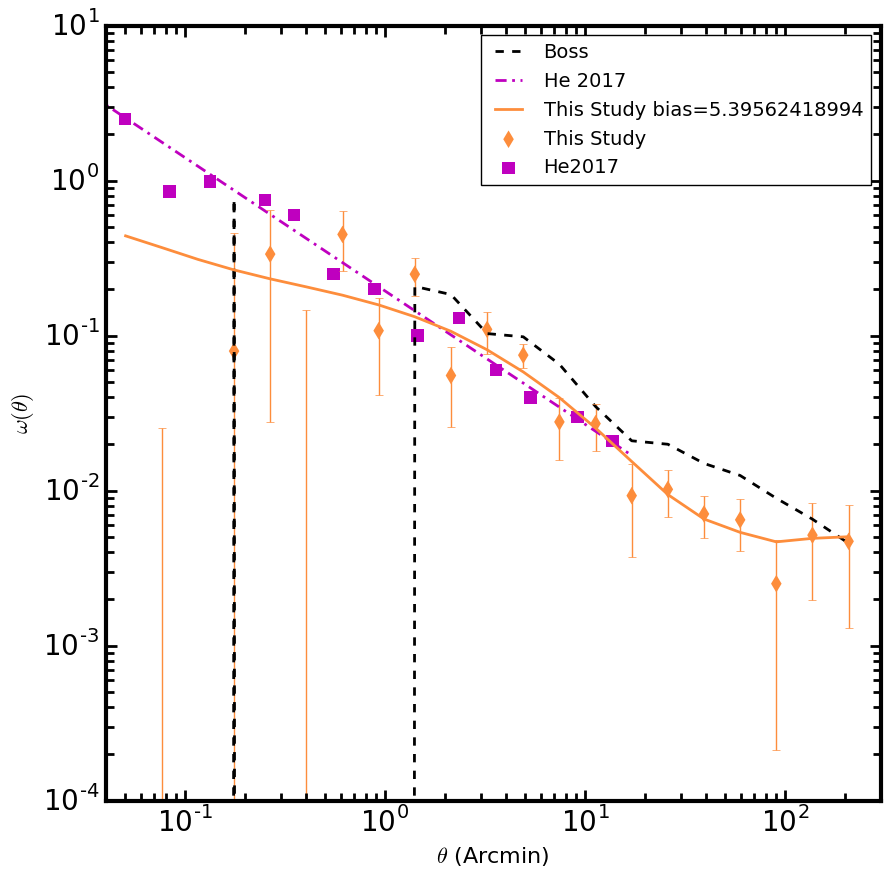

In [62]:
#Plotting Parameters (Replace with Group code call!)
params = {'legend.fontsize': 16, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'xtick.major.width':2, 'xtick.minor.width':2, 'ytick.major.width':2, 'ytick.minor.width':2, 'xtick.major.size':8, 'xtick.minor.size':6, 'ytick.major.size':8, 'ytick.minor.size':6}
plt.rcParams.update(params)
plt.rc("axes", linewidth=3.0)


plt.figure(1,figsize=[10,10])
plt.plot(Bth,Bwt,linestyle = '--', linewidth = 2, color = 'k',label = 'Boss')
plt.plot(ath/60.,Hemod,linestyle = '-.',linewidth = 2 ,dashes = [8,4,2,4], color = 'm',label = 'He 2017')
plt.scatter(separation[0],wnames[0],s = 80,color='#fd8d3c', marker = 'd',edgecolor='None',label=r'This Study')
plt.errorbar(separation[0],wnames[0],yerr=sigma[0]**0.5,elinewidth=1,fmt=',',color='#fd8d3c')

#plt.scatter(separation[1]+0.1*np.asarray(separation[1]),wnames[1],s = 80,color='#1a9641',marker = 's', edgecolor='None',label=r'pre-insp')
#plt.errorbar(separation[1]+0.1*np.asarray(separation[1]),wnames[1],yerr=sigma[1]**0.5,elinewidth=1,fmt=',',color='#1a9641')

plt.scatter(Heth,Hew,s = 80,color='m', marker = 's',edgecolor='None',label='He2017')

#plt.scatter(separation[2]+0.2*np.asarray(separation[2]),wnames[2],s = 80,color = '#a6d96a', marker = 'o',edgecolor='None',label='high-z (z$\geq$3.4)')
#plt.errorbar(separation[2]+0.2*np.asarray(separation[2]),wnames[2],yerr=sigma[2]**0.5,elinewidth=1,fmt=',',color='#a6d96a')


#No Stellar contamination in fit
#plt.plot(separation[0],La,linewidth = 2,color = '#2c7bb6',label='All-z bias=%s'%allzbias)
#plt.plot(separation[1],Ll,linewidth = 2,color = '#fdae61',label='Low-z bias=%s'%lowzbias)
#plt.plot(separation[2],Lh,linewidth = 2,color = '#d7191c',label='High-z bias=%s'%highzbias)


#With Stellar contamination in fit
plt.plot(separation[0],Las,linewidth = 2,color = '#fd8d3c',label='This Study bias=%s'%allzb[0])
#plt.plot(separation[1],Lls,linewidth = 2,color = '#1a9641',label='preinsp bias=%s'%lowzb[0])
#plt.plot(separation[2],Lhs,linewidth = 2,color = '#a6d96a',label='High-z bias=%s'%highzb[0])

#plt.plot(th,8**2*Limber(th),linewidth = 2,color = 'k',label='Shen07 b=8 z=3')
#plt.plot(th,16**2*Limber(th),linewidth = 2,color = 'y',label='Shen07 b=16 z=4')
#plt.plot(thet,omegaall,linewidth=2,label = 'Myers2006 all scale')
#plt.plot(10**np.linspace(-1.4,0,10),omegasmall,linewidth=2,linestyle='-.',dashes = [8,4,2,4],label = 'Myers 2006 small scale')
#plt.plot(10**np.linspace(0,1.69,10),omegamid,linewidth=2,linestyle='--',dashes = [8,4,8,4],label = 'Myers 2006 med scale')
#plt.plot(10**np.linspace(0,2.3,10),omegalarge,linewidth=2,linestyle=':',dashes = [2,4,2,4],label = 'Myers 2006 large scale')

#plt.axvline(4)
#plt.axvline(25)
plt.xlim(0.04,300)
plt.ylim(10**-4,10)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta$ (Arcmin)',fontsize = 16)
plt.ylabel(r'$\omega (\theta)$',fontsize = 16)
plt.legend(fontsize = 14, scatterpoints=1)
#plt.savefig('/Users/johntimlin/Highz_Clustering/Angular_Clustering_Final/model_comparison.png')

plt.show()

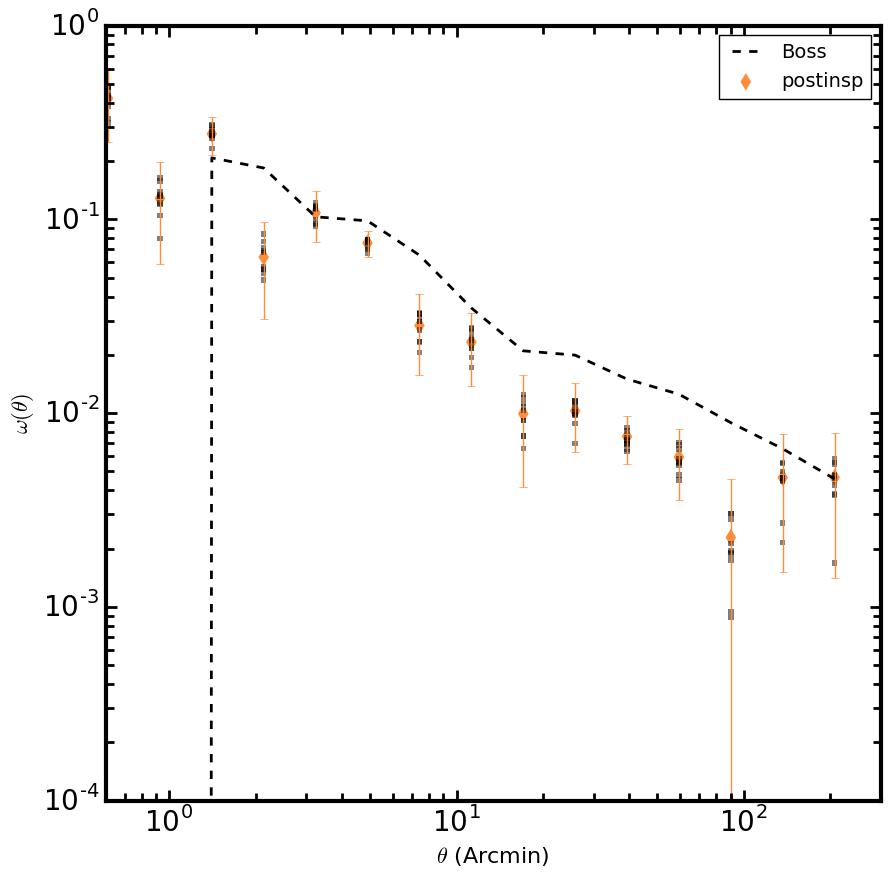

In [30]:
#Plot each JK wtheta result
plt.figure(2,figsize = [10,10])
plt.plot(Bth,Bwt,linestyle = '--', linewidth = 2, color = 'k',label = 'Boss')
plt.scatter(separation[0],wnames[0],s = 80,color='#fd8d3c', marker = 'd',edgecolor='None',label=r'postinsp')
plt.errorbar(separation[0],wnames[0],yerr=sigma[0]**0.5,elinewidth=1,fmt=',',color='#fd8d3c')

for i in range(len(JK_xi[0])):
    print 
    plt.scatter(separation[0],JK_xi[0][i],s = 15,color='k',alpha = 0.5, marker = 's',edgecolor='None')
plt.xlim(0.6,300)
plt.ylim(10**-4,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta$ (Arcmin)',fontsize = 16)
plt.ylabel(r'$\omega (\theta)$',fontsize = 16)
plt.legend(fontsize = 14, scatterpoints=1)
#plt.savefig('/Users/johntimlin/Highz_Clustering/Angular_Clustering_Final/model_comparison.png')

plt.show()

In [16]:
#Biases from different surveys
### ROSS 2009
b = [2.06,1.41,1.38,1.45,1.83,2.37,1.92,2.42,2.79,3.62,2.99]
be = [0.03,0.18,0.06,0.38,0.33,0.25,0.5,0.4,0.47,0.49,1.42]
z = [1.27,0.24,0.49,0.80,1.03,1.23,1.41,1.58,1.74,1.92,2.10]

##SHEN 2007 Biases
#sb = [9.8,11.4,13.7]
#sz = [3,3.5,4]
sb = [7.9,14.2]
sbe = [0.8,1.4]
sz = [3,4]

### EFTEKHARZADEH
eb = [3.69,3.55,3.57]
ebe = [0.11,0.15,0.09]
ez = [2.297,2.497,2.971]

#### HOPKINS 2007 MODELS

maxdatH07 = open('/Users/johntimlin/Clustering/SpIES/high_z_20160513/Hopkins07_clstr_bias_models/Hopkins07_clstr_maximal.dat','rw')
defdatH07 = open('/Users/johntimlin/Clustering/SpIES/high_z_20160513/Hopkins07_clstr_bias_models/Hopkins07_clstr_default.dat','rw')
extdatH07 = open('/Users/johntimlin/Clustering/SpIES/high_z_20160513/Hopkins07_clstr_bias_models/Hopkins07_clstr_extreme_feedback.dat','rw')

maxH07 = maxdatH07.readlines()
defH07 = defdatH07.readlines()
extH07 = extdatH07.readlines()


zH07 = []
bmH07 = []
bdH07 = []
beH07 = []

b20mH07 = []
b20eH07 = []
b20dH07 = []

for i in range(len(maxH07)):
    valm=maxH07[i].split()
    vald=defH07[i].split()
    vale=extH07[i].split()
    zH07.append(np.float(valm[0]))
    bmH07.append(np.float(valm[1]))
    bdH07.append(np.float(vald[1]))
    beH07.append(np.float(vale[1]))
    b20mH07.append(np.float(valm[3]))
    b20eH07.append(np.float(vale[3]))
    b20dH07.append(np.float(vald[3]))
    


<IPython.core.display.Javascript object>


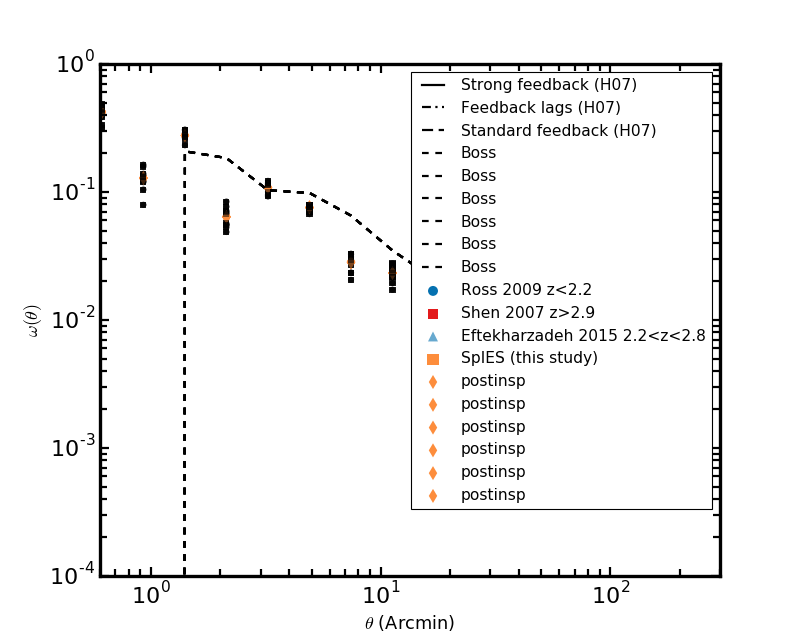

In [17]:
plt.figure(2,figsize=(10,8))
#ax1 = fig.add_subplot(1,1,1)

plt.scatter(z,b,s=80,c='#0571b0', marker = 'o', edgecolor = 'none', label='Ross 2009 z<2.2')
plt.errorbar(z,b,yerr=be,color='#0571b0', fmt=',',linewidth=3)

plt.scatter(sz,sb,s=80,c='#e31a1c', marker = 's',edgecolor = 'none', label='Shen 2007 z>2.9')
plt.errorbar(sz,sb,yerr=sbe,color='#e31a1c', fmt=',',linewidth=3)

plt.scatter(ez,eb,s=80,c='#67a9cf', marker = '^',edgecolor = 'none', label='Eftekharzadeh 2015 2.2<z<2.8')
plt.errorbar(ez,eb,yerr=ebe,color='#67a9cf', fmt=',',linewidth=3)
'''
#No stellar contam
plt.scatter(3.479,allzbias, marker = 'd',c='#ca0020', s=100, edgecolor = 'none', label = 'Candidates')
plt.errorbar(3.479,allzbias,yerr=0.22878057**0.5,color='#ca0020', fmt=',',linewidth=3)

plt.scatter(3.143,lowzbias, marker = 'd',c='#ca0020', s=100, edgecolor = 'none')
plt.errorbar(3.143,lowzbias,yerr=0.60656223**0.5,color='#ca0020', fmt=',',linewidth=3)

plt.scatter(3.803,highzbias, marker = 'd',c='#ca0020', s=100, edgecolor = 'none')
plt.errorbar(3.803,highzbias,yerr=0.50286617**0.5,color='#ca0020', fmt=',',linewidth=3)
'''
#Stellar contam
plt.scatter(3.526,allzb[0], marker = 's',c='#fd8d3c', s=100, edgecolor = 'none', label = 'SpIES (this study)')
plt.errorbar(3.526,allzb[0],yerr=0.22878057**0.5,color='#fd8d3c', fmt=',',linewidth=3)

#plt.scatter(3.479,lowzb[0], marker = 'd',c='#1a9641', s=100, edgecolor = 'none', label = 'previs')
#plt.errorbar(3.479,lowzb[0],yerr=0.60656223**0.5,color='#1a9641', fmt=',',linewidth=3)

#plt.scatter(3.803,highzb[0], marker = 'd',c='#a6d96a', s=100, edgecolor = 'none', label = 'Candidate High-z bin')
#plt.errorbar(3.803,highzb[0],yerr=0.50286617**0.5,color='#a6d96a', fmt=',',linewidth=3)

plt.plot(zH07,beH07, linewidth = 2, linestyle='-', c='k',label = "Strong feedback (H07)")
plt.plot(zH07,bmH07, linewidth = 2, linestyle='-.', c='k',dashes = (8,4,2,4,2,4), label = "Feedback lags (H07)")
plt.plot(zH07,bdH07, linewidth = 2, linestyle='--', dashes = (10,5,10,5), c='k',label = "Standard feedback (H07)")

#plt.plot(zH07,b20mH07, linewidth = 2, linestyle=':', c='k',dashes = (3,2,3,2), label = r"All feedback models at $i$<20.2 (H07)")
#plt.plot(zH07,b20eH07, linewidth = 2, linestyle=':', c='k',dashes = (3,2,3,2), label = r"$i$=20.2 (H07)")
#plt.plot(zH07,b20dH07, linewidth = 2, linestyle=':', c='k',dashes = (3,2,3,2), label = r"Feedback models with $i$=20.2 (H07)")

plt.xlabel('Redshift',fontsize = 16)
plt.ylabel('bias',fontsize = 16)
plt.ylim(0,15)
plt.xlim(0,4.1)
plt.legend(loc = 2, scatterpoints=1)
plt.minorticks_on()
#plt.savefig('/Users/johntimlin/Conferences/AAS_2017/Plots_for_talk/Bais_v_Redshift_spitzer_newmodel.png')
#plt.savefig('/Users/johntimlin/Conferences/AAS_2017/Plots_for_talk/Bais_v_Redshift_spitzer_imag.png')

In [34]:
from astropy.table import Table

file1='../QSO_Candidates_allcuts_with_errors_visualinsp.fits'
data = Table.read(file1)

<IPython.core.display.Javascript object>


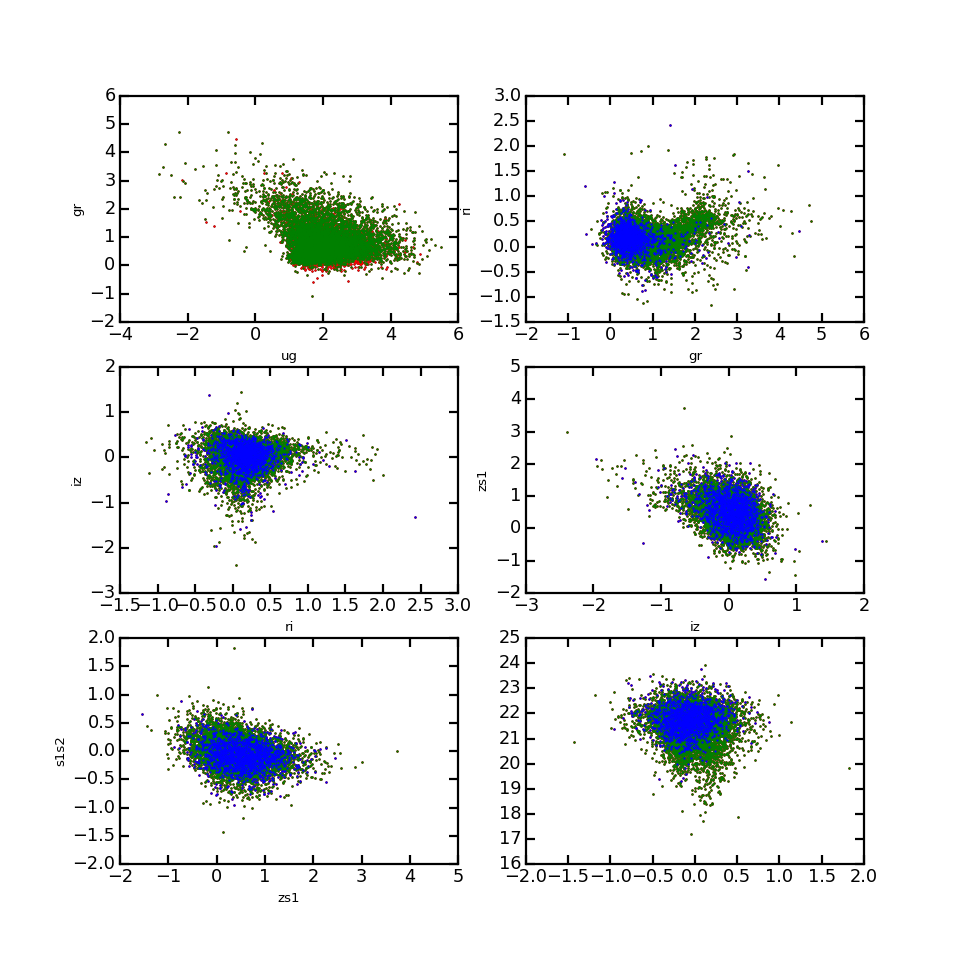

In [45]:
#Plotting Parameters (Replace with Group code call!)
params = {'legend.fontsize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'xtick.major.width':2, 'xtick.minor.width':2, 'ytick.major.width':2, 'ytick.minor.width':2, 'xtick.major.size':8, 'xtick.minor.size':6, 'ytick.major.size':8, 'ytick.minor.size':6}
plt.rcParams.update(params)
plt.rc("axes", linewidth=2.0)

ddx = ()
dx = (data['Good_obj']==0)
dddx= (data['Good_obj']==1)
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12,12))#, sharex='col', sharey='row')
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(data['ug'],data['gr'], s = 1, color = 'k')
ax1.scatter(data['ug'][ddx],data['gr'][ddx], s = 1, color = 'r')
ax1.scatter(data['ug'][dx],data['gr'][dx], s = 1, color = 'g')
ax1.scatter(data['ug'][dddx],data['gr'][dddx], s = 1, color = 'b')

ax1.set_xlabel('ug')
ax1.set_ylabel('gr')

ax2.scatter(data['gr'],data['ri'], s = 1, color = 'k')
ax2.scatter(data['gr'][ddx],data['ri'][ddx], s = 1, color = 'r')
ax2.scatter(data['gr'][dx],data['ri'][dx], s = 1, color = 'g')
ax2.scatter(data['gr'][dddx],data['ri'][dddx], s = 1, color = 'b')

ax2.set_xlabel('gr')
ax2.set_ylabel('ri')

ax3.scatter(data['ri'],data['iz'], s = 1, color = 'k')
ax3.scatter(data['ri'][ddx],data['iz'][ddx], s = 1, color = 'r')
ax3.scatter(data['ri'][dx],data['iz'][dx], s = 1, color = 'g')
ax3.scatter(data['ri'][dddx],data['iz'][dddx], s = 1, color = 'b')

ax3.set_xlabel('ri')
ax3.set_ylabel('iz')

ax4.scatter(data['iz'],data['zs1'], s = 1, color = 'k')
ax4.scatter(data['iz'][ddx],data['zs1'][ddx], s = 1, color = 'r')
ax4.scatter(data['iz'][dx],data['zs1'][dx], s = 1, color = 'g')
ax4.scatter(data['iz'][dddx],data['zs1'][dddx], s = 1, color = 'b')

ax4.set_xlabel('iz')
ax4.set_ylabel('zs1')

ax5.scatter(data['zs1'],data['s1s2'], s = 1, color = 'k')
ax5.scatter(data['zs1'][ddx],data['s1s2'][ddx], s = 1, color = 'r')
ax5.scatter(data['zs1'][dx],data['s1s2'][dx], s = 1, color = 'g')
ax5.scatter(data['zs1'][dddx],data['s1s2'][dddx], s = 1, color = 'b')

ax5.set_xlabel('zs1')
ax5.set_ylabel('s1s2')


ax6.scatter(data['s1s2'],22.5-2.5*np.log10(data['iflux']), s = 1, color = 'k')
ax6.scatter(data['s1s2'][ddx],22.5-2.5*np.log10(data['iflux'][ddx]), s = 1, color = 'r')
ax6.scatter(data['s1s2'][dx],22.5-2.5*np.log10(data['iflux'][dx]), s = 1, color = 'g')
ax6.scatter(data['s1s2'][dddx],22.5-2.5*np.log10(data['iflux'][dddx]), s = 1, color = 'b')

plt.show()